In [3]:

import numpy as np
import pandas as pd
import config as cfg

matplotlib_style = 'default'
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
plt.rcParams.update({'axes.labelsize': 'medium',
                     'axes.titlesize': 'medium',
                     'font.size': 14.0,
                     'text.usetex': True,
                     'text.latex.preamble': r'\usepackage{amsfonts} \usepackage{bm}'})

from utility.plot import make_bar_plot, TFColor

def rename_model_names(df):
    model_name_mapping = {
        'cox': 'CoxPH',
        'rsf': 'RSF',
        'dsm': 'DSM',
        'deepsurv': 'DeepSurv',
        'deephit': 'DeepHit',
        'dcsurvival': 'DCSurvival',
        'mtlr': 'MTLR',
        'mensa-nocop': 'MENSA',
    }
    df['ModelName'] = df['ModelName'].replace(model_name_mapping)
    return df

filename = f"{cfg.RESULTS_DIR}/synthetic_se.csv"
df = pd.read_csv(filename)
df = df.round(3)

df = df.loc[df['ModelName'] != "DGP"]
df = df.loc[df['ModelName'] != "mensa"]

df = rename_model_names(df)

C:\Users\cml\AppData\Local\Temp\ipykernel_8896\149036666.py:53: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(bottom=0.15)


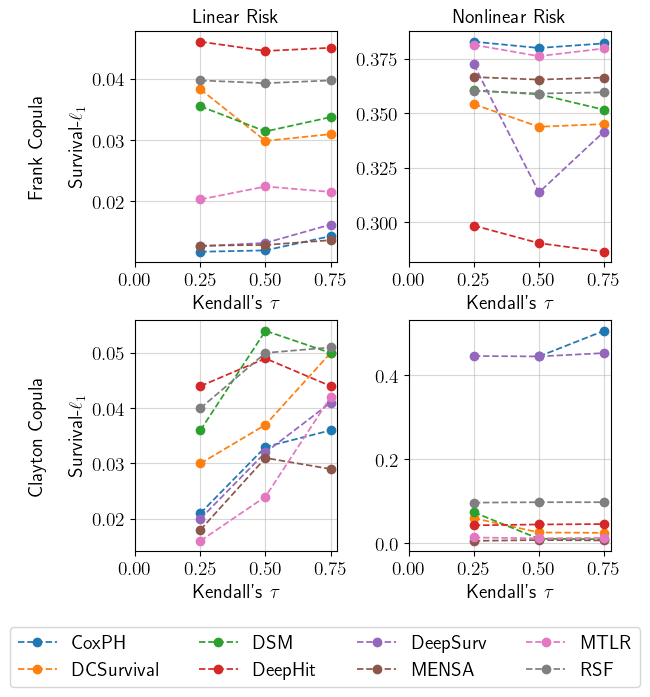

In [4]:
grouped_df = df.groupby(['ModelName', 'KTau', 'Linear', 'Copula'], as_index=False)['L1'].mean()

# Create a 2x3 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(6, 6), constrained_layout=True)

# Define the copulas and linearity values for placement
copulas = ['frank', 'clayton']
linears = [True, False]

# Store handles and labels for the legend
handles = []
labels = []

# Iterate through each combination of copula and linearity
for i, copula in enumerate(copulas):
    for j, linear in enumerate(linears):
        # Filter the data for the current copula and linearity
        plot_data = grouped_df[(grouped_df['Copula'] == copula) & (grouped_df['Linear'] == linear)]
        
        # Create the subplot
        ax = axs[i, j]
        
        # Iterate through each unique model name to create separate plots
        for model in plot_data['ModelName'].unique():
            model_data = plot_data[plot_data['ModelName'] == model]
            
            if model_data['ModelName'].iloc[0] == "MENSA2":
                linestyle = "dashed"
            else:
                linestyle = 'dashed'
            line, = ax.plot(model_data['KTau'], model_data['L1'], marker='o', label=model,
                            linewidth=1.25, markersize=6, linestyle=linestyle)
            
            # Collect handles and labels for the legend
            if model not in labels:
                handles.append(line)
                labels.append(model)
        
        # Set the y-axis label and x-axis label
        ax.set_xlabel(r"Kendall's $\tau$")
        ax.grid(True, alpha=0.5)
        ax.set_xticks([0, 0.25, 0.5, 0.75])
        #ax.set_yticks([0, 0.01, 0.02, 0.03, 0.04])
        
        # Set titles for columns and rows
        if i == 0:
            ax.set_title("Linear Risk" if linear else "Nonlinear Risk")

# Create a shared legend below the plot
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.02), ncol=4)

# Adjust layout to make space for the legend
plt.subplots_adjust(bottom=0.15)

# Add column names
for ax, linear in zip(axs[0], linears):
    ax.set_title("Linear Risk" if linear else "Nonlinear Risk")

# Add row names
for ax, copula in zip(axs[:, 0], copulas):
    ax.set_ylabel(f"{copula.capitalize()} Copula\n\n" + r"Survival-$\ell_{1}$")

# Save the entire figure as a single PDF file
fig.savefig(f"{cfg.RESULTS_DIR}/survival_l1.pdf", format='pdf', bbox_inches='tight')